# Tutorial:   Statistics and Biomechanics  (ISB 2019, Calgary)

This series of [Jupyter notebooks](https://jupyter.org) is provided as supplementary material for the tutorial "[Statistics and Biomechanics](https://isbweb.org/news/isb-now/163-september-2018/632-isb-tutorials-in-calgary-2019)", held at the [XXVII Congress of the International Society of Biomechanics](https://isb2019.com) on July 31, 2019. All notebooks are provided in both Python and Matlab (as separate notebooks). No statistics knowledge or programming experience is required, but basic experience with Python or Matlab, as well as familiarity with [t tests](https://en.wikipedia.org/wiki/Student%27s_t-test), [regression](https://en.wikipedia.org/wiki/Linear_regression) and [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) will be helpful. Links are provided throughout these notebooks for extra reading.

The notebooks start with concepts related to [classical hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) involving [parametric distributions](https://en.wikipedia.org/wiki/Parametric_statistics) and simple [univariate data](https://en.wikipedia.org/wiki/Univariate_(statistics)), and work through [multivariate data](https://en.wikipedia.org/wiki/Multivariate_random_variable), and [one-dimensional univariate](http://www.spm1d.org/rft1d/Theory.html) data.

The main theme of these notebooks is: **simulating random data**. Moreso than any other resource, simulations of random data taught me the meaning of Statistics and its probabilities. Simulations bridge the gap between theory and practical data analysis. And they're fun! Simulating random numbers, manipulating them, and seeing how different types of random data behave in different simulated experiments, to me represents the essence of Applied Statistics and indeed of Science.

In addition to these notebooks, supplementary material from a number of published papers are provided for extra reading. These deal with a variety of topics including: [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval), [nonparametric statistical inference](https://en.wikipedia.org/wiki/Nonparametric_statistics), and [Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference).

All topics mentioned above will be briefly addressed during the ISB Tutorial session. This notebook content is meant primarily to compliment tutorial discussions, and to promote critical thinking regarding statistical analyses of biomechanical data.

&copy; Todd Pataky, 2019
___

# Notebook 1:  Simulating experiments

The purposes of this notebook are:
1. To demonstrate how to simulate experiments involving random data.
2. To demonstrate the properties of small, random samples, and thereby highlight the importance of applied statistics.

This notebook considers [univariate zero-dimensional Gaussian data](https://en.wikipedia.org/wiki/Scalar_(physics)), or simply "scalars", like body mass. Other notebooks will expand the scope of simulation to data types which are more consistent with the data often measured in biomechanics experiments like: joint dynamics, external forces and EMG signals.  

### Part 1:  Simulating random data

Random data from the standard normal distribution (with population mean $\mu=0$ and population standard deviation $\sigma=1$) can be simulated as follows:

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
np.random.seed(0)      #seed the random number generator (to produce repeatable results)
J = 5                  #sample size
y = np.random.randn(J) #random sample from the standard normal distribution

print('Data sample:', y)

Data sample: [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]


Although the true population mean and standard deviation (SD) are $\mu=0$ and $\sigma=1$, respectively, note that the sample mean ($\overline{y}$) and sample SD ($s$) are generally not the same as the population value:

In [3]:
ybar = y.mean()        #sample mean
s    = y.std(ddof=1)   #sample standard deviation

print('Sample mean: %.5f' %ybar)
print('Sample SD:   %.5f' %s)

Sample mean: 1.45028
Sample SD:   0.74544


Also note that $\overline{y}$ and $s$ approach their respective population values as the sample size increases:

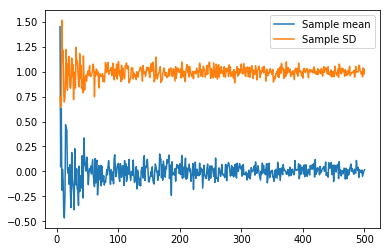

In [4]:
np.random.seed(0)      #seed the random number generator (to produce repeatable results)
Js    = np.arange(5, 501) #sample sizes
ybars = []
ss    = []
for J in Js:
    y = np.random.randn(J)
    ybars.append( y.mean() )
    ss.append( y.std(ddof=1) )
    
ax = pyplot.axes()
ax.plot(Js, ybars, label='Sample mean')
ax.plot(Js, ss, label='Sample SD')
ax.legend()
pyplot.show()

From the figure above we can see that the differences between the sample and population values tend to be largest for small sample sizes ($J<25$) and that they stabilize for larger sample sizes ($J>50$), but that they never totally converge to the population values, even for relatively large samples ($J$=500).

CONGRATULATIONS!  We have just learned (or re-learned) the fundamental concept that underlies all of classical hypothesis testing: **small, randomly sampled data exhibit characteristics that are not necessarily representative of the populations from which they are drawn**.

Due to this fundamental property of random sampling, one needs to place certain caveats on results obtained from randomly sampled data. The most important caveat is the probability value (or "p value"), but we will get to that in Notebook 3. Let's first clarify the small-sample properties of the sample mean and SD.

___
### Part 2:  Properties of random samples

The results in the figure above indicate that the the sample mean and SD's estimate their respective population parameters more accurately as sample size $J$ increases. However, only a single random sample was drawn for each sample size. Let's repeat with more random samples for each sample size, and let's first try 100 repetitions:

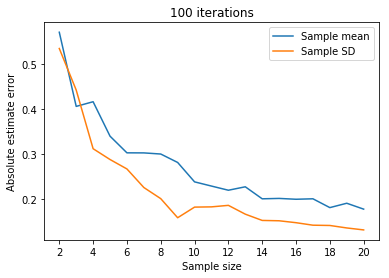

In [5]:
np.random.seed(0)
Js    = np.arange(2, 21)      #sample sizes
niter = 100                   #number of iterations per sample size
ybar  = np.empty( (Js.size, niter) )
s     = np.empty( (Js.size, niter) )
for i,J in enumerate(Js):
    for ii in range(niter):
        y          = np.random.randn(J)
        ybar[i,ii] = y.mean()
        s[i,ii]    = y.std(ddof=1)
  

ybar_error = np.abs( ybar ).mean(axis=1)   #absolute error for the mean estimate (averaged across iterations)
s_error    = np.abs( (s-1) ).mean(axis=1)   #absolute error for the SD estimate (averaged across iterations)


ax = pyplot.axes()
ax.plot(Js, ybar_error, label='Sample mean')
ax.plot(Js, s_error, label='Sample SD')
ax.set_xticks( np.arange(2, 21, 2) )
ax.set_xlabel('Sample size')
ax.set_ylabel('Absolute estimate error')
ax.set_title('%d iterations' %niter)
ax.legend()
pyplot.show()

These results suggest that, on average, the sample mean and SD improve with sample size.

Let's repeat for 1000 iterations:

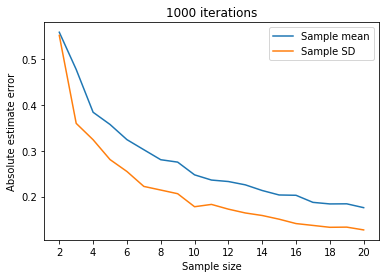

In [6]:
np.random.seed(0)
Js    = np.arange(2, 21)      #sample sizes
niter = 1000                  #number of iterations per sample size
ybar  = np.empty( (Js.size, niter) )
s     = np.empty( (Js.size, niter) )
for i,J in enumerate(Js):
    for ii in range(niter):
        y          = np.random.randn(J)
        ybar[i,ii] = y.mean()
        s[i,ii]    = y.std(ddof=1)
  

ybar_error = np.abs( ybar ).mean(axis=1)   #absolute error for the mean estimate (averaged across iterations)
s_error    = np.abs( (s-1) ).mean(axis=1)   #absolute error for the SD estimate (averaged across iterations)


ax = pyplot.axes()
ax.plot(Js, ybar_error, label='Sample mean')
ax.plot(Js, s_error, label='Sample SD')
ax.set_xticks( np.arange(2, 21, 2) )
ax.set_xlabel('Sample size')
ax.set_ylabel('Absolute estimate error')
ax.set_title('%d iterations' %niter)
ax.legend()
pyplot.show()

And let's repeat again, this time for 100,000 iterations (this code may take a minute or two to execute):

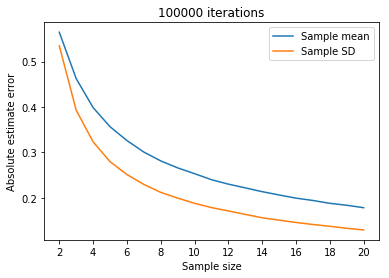

In [7]:
np.random.seed(0)
Js    = np.arange(2, 21)      #sample sizes
niter = 100000                #number of iterations per sample size
ybar  = np.empty( (Js.size, niter) )
s     = np.empty( (Js.size, niter) )
for i,J in enumerate(Js):
    for ii in range(niter):
        y          = np.random.randn(J)
        ybar[i,ii] = y.mean()
        s[i,ii]    = y.std(ddof=1)
  

ybar_error = np.abs( ybar ).mean(axis=1)   #absolute error for the mean estimate (averaged across iterations)
s_error    = np.abs( (s-1) ).mean(axis=1)   #absolute error for the SD estimate (averaged across iterations)


ax = pyplot.axes()
ax.plot(Js, ybar_error, label='Sample mean')
ax.plot(Js, s_error, label='Sample SD')
ax.set_xticks( np.arange(2, 21, 2) )
ax.set_xlabel('Sample size')
ax.set_ylabel('Absolute estimate error')
ax.set_title('%d iterations' %niter)
ax.legend()
pyplot.show()

The figures above show:
* SD estimates are poorer than mean estimates
* Long-term trends (i.e., trends across iterations) become clearer as the number of iterations increases.

These two concepts are also fundamental to classical hypothesis testing, and indeed to most probability calculations: **means and SD accuracy is sample-size dependent**, and **the behavior of random data is only clear when considered across many experiments**. In fact, we will see in Notebook 3 that hypothesis testing results pertain only to the infinite set of experiments, and not to individual experiments.

___
### Part 3:  Simulating realistic experiments

The simulations above used random samples from the standard normal distribution ($\mu=0$, $\sigma=1$), but this distribution rarely corresponds to real experimental data. Data from arbitrary normal distributions can be simulated simply by scaling by an arbitrary SD value, then adding an arbitrary mean value. For example, imagine that we want to simulate body mass, and that we assume population parameters of $\mu=70$ kg and $\sigma=5$ kg. We can generate a single random sample like this:

In [8]:
np.random.seed(0)
J     = 5     #sample size
mu    = 70    #population mean
sigma = 5     #population SD
y     = mu + sigma * np.random.randn(J) 

print(y)

[78.82026173 72.00078604 74.89368992 81.204466   79.33778995]


These look like real data that might be obtained in a particular experiment. Let's repeat over 10,000 iterations and then check the distribution of the sample mean and SD values:

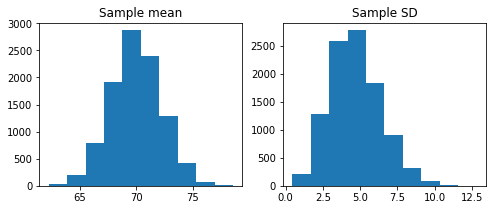

In [9]:
np.random.seed(0)
J     = 5     #sample size
mu    = 70    #population mean
sigma = 5     #population SD
niter = 10000 #number of simulation iterations
ybar  = np.empty(niter)
s     = np.empty(niter)
for i in range(niter):
    y       = mu + sigma * np.random.randn(J) 
    ybar[i] = y.mean()
    s[i]    = y.std(ddof=1)


pyplot.figure(figsize=(8,3))
ax0 = pyplot.subplot(121)
ax1 = pyplot.subplot(122)
ax0.hist(ybar)
ax1.hist(s)
ax0.set_title('Sample mean')
ax1.set_title('Sample SD');

These distributions are centered close to their population values, but still embody substantial variability.

The points here are that:
* Even when the population mean and SD are precisely known, random sampling naturally produces error in their sample-based estimates.
* It is nevertheless easy to simulate experimental data whose values look realistic, like those you might expect in a real experiment.
* Simulating a large number of experiments **before** actually conducting an experiment can be useful for:
  * Deciding how to analyze the data
  * Understanding what types of results random data often produce, and what types of results could be considered surprising

Last, let's repeat the sample-size simulation from above, using 1000 iterations, and this time using the new population mean and SD:

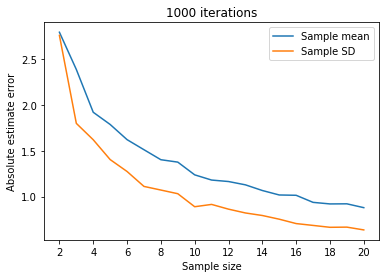

In [10]:
np.random.seed(0)
Js    = np.arange(2, 21)      #sample sizes
mu    = 70                    #population mean
sigma = 5                     #population SD
niter = 1000                  #number of iterations per sample size
ybar  = np.empty( (Js.size, niter) )
s     = np.empty( (Js.size, niter) )
for i,J in enumerate(Js):
    for ii in range(niter):
        y          = mu + sigma * np.random.randn(J)
        ybar[i,ii] = y.mean()
        s[i,ii]    = y.std(ddof=1)
  

ybar_error = np.abs( ybar - mu ).mean(axis=1)   #absolute error for the mean estimate (averaged across iterations)
s_error    = np.abs( (s-sigma) ).mean(axis=1)   #absolute error for the SD estimate (averaged across iterations)

ax = pyplot.axes()
ax.plot(Js, ybar_error, label='Sample mean')
ax.plot(Js, s_error, label='Sample SD')
ax.set_xticks( np.arange(2, 21, 2) )
ax.set_xlabel('Sample size')
ax.set_ylabel('Absolute estimate error')
ax.set_title('%d iterations' %niter)
ax.legend()
pyplot.show()

Note that the results are extactly the same as for the standard normal distribution case ($\mu=0$, $\sigma=1$). When simulating experiments for, it is usually sufficient to use just the standard normal distribution unless one is specifically interested in other cases.

___

### Summary

This notebook has shown that:
* Small, randomly sampled data exhibit characteristics that are not necessarily representative of the populations from which they are drawn
* It is relatively easy to simulate experiments that produce realistic-looking data

Together, these points imply that:
* Simulating an experiment **before** actually conducting it can be useful for:
  * Deciding how to analyze the data
  * Understanding what types of results random data often produce, and what types of results could be considered surprising